# データ準備

In [1]:
from scipy.io import arff
import numpy as np

dataset, meta = arff.loadarff('data/ECG5000_TRAIN.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset = ds[:, :140]
y_dataset = np.asarray(ds[:,-1].tolist(), dtype=np.int8)-1

[0 0 0 0 0 0 0 0 0 0]


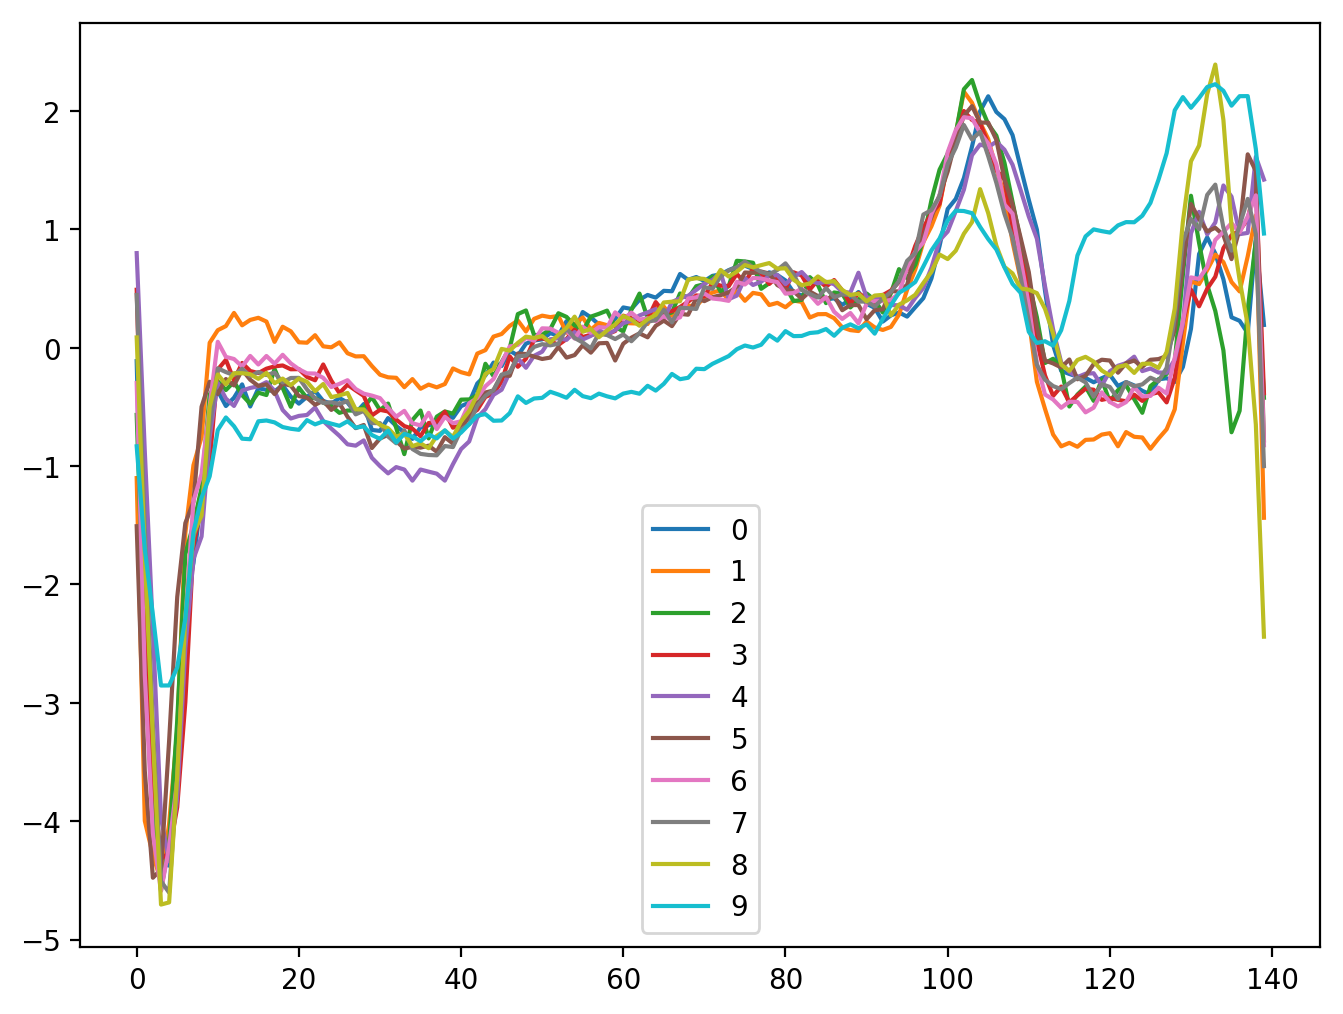

In [2]:
N = 10
print(y_dataset[:N])
obj = plt.plot(x_dataset[:N].T)
plt.legend(obj, [str(n) for n in range(N)])

In [3]:
dataset, meta = arff.loadarff('data/ECG5000_TEST.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset_test = ds[:, :140]
y_dataset_test = np.asarray(ds[:,-1].tolist(), dtype=np.int8)-1

In [4]:
x_train = x_dataset.reshape(x_dataset.shape[0], x_dataset.shape[1], 1)
x_test = x_dataset_test.reshape(x_dataset_test.shape[0], x_dataset_test.shape[1], 1)

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_dataset)
y_test = to_categorical(y_dataset_test)

# モデル構築

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

# SimpleRNNにDenseを接続し、分類
model = Sequential()

model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:])) # input_shape=(系列長T, x_tの次元), output_shape=(units(=hid_dim),)
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


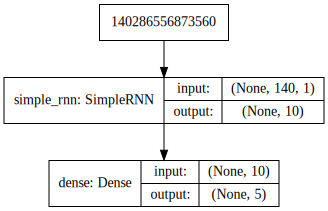

In [8]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# モデル学習

In [9]:
model.fit(x_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Train on 400 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 0s - loss: 1.7981 - acc: 0.0075 - val_loss: 1.6454 - val_acc: 0.1600
Epoch 2/50
 - 0s - loss: 1.7365 - acc: 0.0075 - val_loss: 1.6273 - val_acc: 0.1700
Epoch 3/50
 - 0s - loss: 1.6772 - acc: 0.0100 - val_loss: 1.6132 - val_acc: 0.1700
Epoch 4/50
 - 0s - loss: 1.6207 - acc: 0.0275 - val_loss: 1.6043 - val_acc: 0.1700
Epoch 5/50
 - 0s - loss: 1.5645 - acc: 0.0500 - val_loss: 1.6013 - val_acc: 0.1600
Epoch 6/50
 - 0s - loss: 1.5128 - acc: 0.1475 - val_loss: 1.5964 - val_acc: 0.1500
Epoch 7/50
 - 0s - loss: 1.4656 - acc: 0.2500 - val_loss: 1.5825 - val_acc: 0.1300
Epoch 8/50
 - 0s - loss: 1.4197 - acc: 0.2875 - val_loss: 1.5645 - val_acc: 0.0900
Epoch 9/50
 - 0s - loss: 1.3738 - acc: 0.3325 - val_loss: 1.5466 - val_acc: 0.0800
Epoch 10/50
 - 0s - loss: 1.3297 - acc: 0.3800 - val_loss: 1.5298 - val_acc: 0.2500
Epoch 11/50
 - 0s - loss: 1.2865 - acc: 0.5450 - val_loss: 1.5155 - val_acc

# モデルによる分類精度の評価

In [10]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

test_loss: 0.5426096523072984
test_acc: 0.89
